In [1]:
import pandas as pd
import numpy as np
from dict_func import dict_extraction
from dict_func import dict_summary

In [2]:
common_colors_g = ["black", "white", "red", "green", "yellow", "blue", "brown", "orange", "pink", "purple", "gray", "grey"]
common_colors = ["black", "white", "red", "green", "yellow", "blue", "brown", "orange", "pink", "purple", "gray"]


In [3]:

df = pd.read_csv('dict/resenecolours.csv')
df = df.drop(df.index[range(0, 26)])
df = df.reset_index(drop=True)
df.columns = ['ColorName', 'R', 'G', 'B']
#colorNames = df['ColorName']
#resenecolours = colorNames.to_numpy()
#resenecolours
resene= df
resene



,ColorName,R,G,B
0,Resene Abbey,76,79,86
1,Resene Acadia,27,20,4
2,Resene Acapulco,124,176,161
3,Resene Acorn,106,93,27
4,Resene Aero Blue,201,255,229
...,...,...,...,...
1378,Resene Zombie,228,214,155
1379,Resene Zorba,165,155,145
1380,Resene Zuccini,4,64,34
1381,Resene Zumthor,237,246,255


In [4]:
resene_extracted = dict_extraction(resene)
print(dict_summary(resene_extracted))

[15, 36, 19, 58, 8, 59, 17, 3, 26, 3, 0]


In [5]:
df = pd.read_csv('dict/NBS-ISCC-rgb.csv')
df = df.drop(columns = ["Centroids", "http://tx4.us/nbs-iscc.htm"])
df = df.rename(columns={'Unnamed: 0' : 'R', 'NBS/ISCC' : 'G', 'Color': 'B', 'System': 'ColorName'})
df = df.drop(df.index[range(0, 9)])
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.reset_index(drop=True)


#colorNames = df['ColorName']
#nbs = colorNames.to_numpy()
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
NBS =  df
NBS

,ColorName,R,G,B
0,verydarkbluishgreen,0,42,41
1,verydarkgreenishblue,0,46,59
2,darkgreenishblue,0,73,88
3,darkbluishgreen,0,75,73
4,deepbluishgreen,0,68,63
...,...,...,...,...
261,deeppurplishred,120,24,74
262,deepred,132,27,45
263,verydeepred,92,9,35
264,deepreddishpurple,112,41,99


In [6]:
NBS_extracted = dict_extraction(NBS)
print(dict_summary(NBS_extracted))

[4, 3, 16, 26, 34, 30, 19, 20, 23, 22, 56]


In [7]:
df = pd.read_csv('dict/saturate.csv')
df = df.drop(df.index[range(0, 21)])
df = df.drop(index=40)
df = df.rename(columns={';"saturate.txt" Saturated-Colors Dictionary.': 'ColorNames', 'Unnamed: 1' : 'X', 'Unnamed: 2' : 'Y', 'Unnamed: 3' : 'Z'})
df= df.reset_index(drop=True)



from colormath.color_objects import XYZColor, LabColor,sRGBColor
from colormath.color_conversions import convert_color

saturate = pd.DataFrame(columns=['ColorName', 'R', 'G', 'B'])

for index, row in df.iterrows():
    xyz_list = [float(row[1]), float(row[2]), float(row[3])]
    xyz = XYZColor(*[component for component in xyz_list])
    rgb = convert_color(xyz, sRGBColor)
    new_row = {'ColorName': row[0], 'R': int(255*rgb.clamped_rgb_r), 'G' : int(255*rgb.clamped_rgb_g), 'B' : int(255*rgb.clamped_rgb_b) }
    saturate = saturate.append(new_row, ignore_index= True)

saturate



,ColorName,R,G,B
0,red,255,0,0
1,reddish orange,255,57,0
2,orange,255,128,0
3,yellowish orange,244,164,0
4,yellow,225,182,0
5,greenish yellow,202,198,0
6,yellow green,110,235,0
7,yellowish green,0,255,0
8,green,0,255,111
9,bluish green,0,194,238


In [8]:
for i in saturate.R:
    if int(i)> 255:
        print(i)

In [9]:
saturate_extracted = dict_extraction(saturate)
print(dict_summary(saturate_extracted))

[0, 0, 2, 2, 4, 4, 0, 3, 0, 4, 0]


In [10]:
df = pd.read_csv('dict/winsor-newton-lab.csv')
df = df.drop(df.index[range(0, 18)])
df = df.drop(index=618)
df = df.rename(columns={';"winsor-newton-lab.txt" color dictionary': 'ColorNames', 'Unnamed: 1' : 'L', 'Unnamed: 2' : 'a', 'Unnamed: 3' : 'b'})
df= df.reset_index(drop=True)

winsor = pd.DataFrame(columns=['ColorName', 'R', 'G', 'B'])

for index, row in df.iterrows():
    lab = LabColor(row[1], row[2], row[3])
    rgb = convert_color(lab, sRGBColor)
    new_row = {'ColorName': row[0], 'R': int(255*rgb.clamped_rgb_r), 'G' : int(255*rgb.clamped_rgb_g), 'B' : int(255*rgb.clamped_rgb_b)}
    winsor = winsor.append(new_row, ignore_index= True)

winsor

,ColorName,R,G,B
0,lamp black light,113,111,104
1,LampBlackLight,113,111,104
2,lamp black medium,35,36,36
3,LampBlackMedium,35,36,36
4,lamp black dark,26,27,27
...,...,...,...,...
595,LemonYellowLight,242,229,148
596,lemon yellow medium,243,227,113
597,LemonYellowMedium,243,227,113
598,lemon yellow dark,244,224,76


In [11]:
winsor_extracted = dict_extraction(winsor)
print(dict_summary(winsor_extracted))

[18, 0, 51, 84, 90, 54, 18, 12, 0, 12, 18]


In [12]:
df = pd.read_csv('dict/satfaces.csv')

df= df.reset_index(drop=True)

survey_rgb = df
survey_cols = df.columns.tolist()
survey_cols = survey_cols[-1:] + survey_cols[:-1]
survey_rgb = df[survey_cols]

survey_rgb.columns = ['ColorName', 'R', 'G', 'B']



survey_rgb

,ColorName,R,G,B
0,black,0,1,0
1,black,0,2,0
2,black,0,3,0
3,black,0,4,0
4,black,0,5,0
...,...,...,...,...
196602,yellow,251,255,0
196603,yellow,252,255,0
196604,yellow,253,255,0
196605,yellow,254,255,0


In [13]:
survey_rgb_extracted = dict_extraction(survey_rgb)
survey_rgb_extracted.to_csv('survey_rgb_extracted.csv', index = False)
print(dict_summary(survey_rgb_extracted))

[1781, 0, 15476, 51664, 7808, 42990, 10529, 9152, 12627, 26416, 0]


In [14]:
survey_rgb_extracted = pd.read_csv('survey_rgb_extracted.csv')
frames = [resene_extracted, NBS_extracted, saturate_extracted, winsor_extracted, survey_rgb_extracted]
dataset = pd.concat(frames)
dataset = dataset.reset_index(drop=True)
dataset.to_csv('combined_dicts.csv', index=False)
print(dict_summary(dataset))

[1818, 39, 15564, 51834, 7944, 43137, 10583, 9190, 12676, 26457, 74]


In [15]:
dataset = pd.read_csv('combined_dicts.csv')
dataset

,ColorName,R,G,B
0,blue,201,255,229
1,white,245,233,211
2,green,226,243,236
3,white,255,254,236
4,brown,46,25,5
...,...,...,...,...
179311,yellow,251,255,0
179312,yellow,252,255,0
179313,yellow,253,255,0
179314,yellow,254,255,0


In [16]:
dict_summary(dataset)

[1818, 39, 15564, 51834, 7944, 43137, 10583, 9190, 12676, 26457, 74]

In [17]:
for i in dataset.B:
    if i> 255:
        print(i)

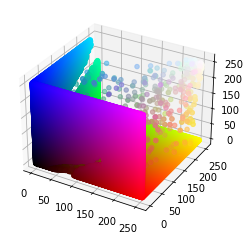

In [18]:

import matplotlib.pyplot as plt
r = pd.to_numeric(dataset['R'])
g = pd.to_numeric(dataset['G']) 
b = pd.to_numeric(dataset['B'])
#c = dataset['ColorName'].to_numpy()
r1 = dataset.R.to_numpy()
r1 = r1.astype(int)


g1 = dataset.G.to_numpy()
g1 = g1.astype(int)


b1 = dataset.B.to_numpy()
b1 = b1.astype(int)

c1 = np.column_stack((r1,g1,b1))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(r, g, b, c =c1/255.0)

In [19]:
Data = dataset.drop(columns = 'ColorName').values.tolist()
labels = dataset.drop(columns = ['R', 'G', 'B']).values.tolist()
labels = np.array(labels)
labels = np.ravel(labels, order = 'C')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(Data, labels, test_size=0.3)

X_s = preprocessing.StandardScaler().fit(X_train).transform(X_train)

X_normalized = preprocessing.normalize(X_train)


In [21]:
from sklearn import svm

clf_linear = clf_s = clf_n = clf_raw = svm.SVC(kernel='linear') # Linear Kernel

clf_raw.fit(X_train, y_train)
clf_s.fit(X_s, y_train)
clf_n.fit(X_normalized, y_train)


scores_raw = cross_val_score(clf_raw, X_test, y_test, cv=5)
scores_s = cross_val_score(clf_s, X_s, y_test, cv=5)
scores_n = cross_val_score(clf_n, X_normalized, y_test, cv=5)

print(scores_raw)
print(scores_raw.mean(), scores_raw.std())
print(scores_s)
print(scores_s.mean(), scores_s.std())
print(scores_n)
print(scores_n.mean(), scores_n.std())


ValueError: Found input variables with inconsistent numbers of samples: [125521, 53795]

In [ ]:
clf_linear_s = svm.SVC(kernel='linear')
clf_linear_s.fit(Data, labels)


scores_linear = cross_val_score(clf_linear_s, X_train, y_train, cv=5)
scores_linear.mean(), scores_linear.std()

(0.9911887265962245, 0.00041957892092010486)

In [ ]:
clf_poly = svm.SVC(kernel='poly') # poly Kernel

clf_poly.fit(X_train, y_train)

scores_poly = cross_val_score(clf_poly, X_test, y_test, cv=5)
print(scores_poly)
print(scores_poly.mean(), scores_poly.std())

[0.99014778 0.99005484 0.99135607 0.99172786 0.99014778]
0.990686866809183 0.0007088270644088545


In [ ]:
clf_rbf = svm.SVC(kernel='rbf') # rbf Kernel

clf_rbf.fit(X_train, y_train)

scores_rbf = cross_val_score(clf_rbf, X_test, y_test, cv=5)
print(scores_rbf)
print(scores_rbf.mean(), scores_rbf.std())

[0.99191375 0.99154196 0.99209964 0.99144902 0.99200669]
0.9918022121014964 0.0002589160382411709


In [ ]:
clf_sigmoid = svm.SVC(kernel='sigmoid') # sigmoid Kernel

clf_sigmoid.fit(Data, labels)

scores_sigmoid = cross_val_score(clf_sigmoid, X_test, y_test, cv=5)
print(scores_sigmoid)
print(scores_sigmoid.mean(), scores_sigmoid.std())

[0.7838089  0.80100381 0.79589181 0.80806766 0.77906869]
0.7935681754809927 0.010736868107721634


In [ ]:
var_c = 10  ** (-6)
for i in range(10) :
    var_c *= 10
    clf_linear = svm.SVC(kernel='linear', C=var_c) # Linear Kernel
    clf_linear.fit(X_train, y_train)
    scores_linear = cross_val_score(clf_linear, X_test, y_test, cv=5)
    print('C=',var_c,scores_linear)
    print(scores_linear.mean(), scores_linear.std())
    print(clf_linear)

    

C= 9.999999999999999e-06 [0.28906032 0.28906032 0.28906032 0.28906032 0.28906032]
0.28906032159122597 0.0
SVC(C=9.999999999999999e-06, kernel='linear')
C= 9.999999999999999e-05 [0.63472442 0.63751278 0.63351613 0.63723394 0.63751278]
0.636100009294544 0.0016641127850048913
SVC(C=9.999999999999999e-05, kernel='linear')
C= 0.001 [0.9327075  0.93112743 0.93326517 0.93382285 0.93038386]
0.9322613625801652 0.0013004392551272778
SVC(C=0.001, kernel='linear')
C= 0.01 [0.97574124 0.97165164 0.97481179 0.97499768 0.97248815]
0.9739380983362766 0.0015790880625779723
SVC(C=0.01, kernel='linear')
C= 0.1 [0.98782415 0.98680175 0.98847477 0.98810298 0.98708058]
0.9876568454317315 0.0006259859927682169
SVC(C=0.1, kernel='linear')
C= 1.0 [0.99033367 0.99135607 0.99144902 0.99051957 0.99089135]
0.9909099358676456 0.00044146638486988136
SVC(kernel='linear')
C= 10.0 [0.99172786 0.99172786 0.99209964 0.9907984  0.99209964]
0.9916906775722651 0.0004761129649545643
SVC(C=10.0, kernel='linear')
C= 100.0 [0.9

In [ ]:
from sklearn.neural_network import MLPClassifier
for i in range(6, 16):
    clf_mlp = MLPClassifier(hidden_layer_sizes=(i), max_iter=10000)
    clf_mlp.fit(X_train, y_train)
    scores_mlp = cross_val_score(clf_mlp, X_test, y_test, cv=5)
    print('n=',i,scores_mlp)
    print(scores_mlp.mean(), scores_mlp.std())



n= 6 [0.9918208  0.99126313 0.99024073 0.98940422 0.99005484]
0.9905567431917465 0.0008691268502694065
n= 7 [0.9918208  0.99163491 0.99061251 0.99107724 0.99154196]
0.991337484896366 0.0004375351722628326
n= 8 [0.99172786 0.99144902 0.99191375 0.99042662 0.99117018]
0.9913374848963658 0.0005204944697462466
n= 9 [0.99312204 0.99228553 0.9918208  0.9918208  0.99209964]
0.9922297611302167 0.0004797281494772653
n= 10 [0.99349382 0.9918208  0.99200669 0.99200669 0.99228553]
0.9923227065712424 0.0006040738659456342
n= 11 [0.9938656  0.99144902 0.9928432  0.99144902 0.99209964]
0.992341295659448 0.0009193615034020589
n= 12 [0.99256436 0.99135607 0.99228553 0.99247142 0.99312204]
0.992359884747653 0.0005741591304575118
n= 13 [0.99209964 0.99256436 0.99219258 0.99265731 0.99191375]
0.9922855283948323 0.000281917480957389
n= 14 [0.99219258 0.99265731 0.99247142 0.99191375 0.99200669]
0.9922483502184217 0.00027945527239283486
n= 15 [0.99330793 0.99172786 0.99265731 0.99144902 0.99293615]
0.992415

In [ ]:
from sklearn.neighbors import (KNeighborsClassifier,NeighborhoodComponentsAnalysis)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
scores_knn = cross_val_score(knn, X_test, y_test, cv=5)
print(scores_knn.mean(), scores_knn.std())


0.9921554047773956 0.0004461381169253542


In [ ]:
"""from sklearn.pipeline import Pipeline
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=1)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)

scores_knn = cross_val_score(nca_pipe, X_test, y_test, cv=5)
print(scores_knn)
print(scores_knn.mean(), scores_knn.std()) """

"from sklearn.pipeline import Pipeline\nnca = NeighborhoodComponentsAnalysis(random_state=42)\nknn = KNeighborsClassifier(n_neighbors=1)\nnca_pipe = Pipeline([('nca', nca), ('knn', knn)])\nnca_pipe.fit(X_train, y_train)\n\nscores_knn = cross_val_score(nca_pipe, X_test, y_test, cv=5)\nprint(scores_knn)\nprint(scores_knn.mean(), scores_knn.std()) "

In [ ]:
clf_best = MLPClassifier(hidden_layer_sizes=(12), max_iter=10000)
clf_best.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=13, max_iter=10000)

In [ ]:
n = 256
X = np.zeros((256**3,3))
for i in range(n):
    for j in range(n):
        for k in range(n):
            X[i*65536+j*256+k][0] = i
            X[i*65536+j*256+k][1] = j
            X[i*65536+j*256+k][2] = k


In [ ]:
X
X.shape

(16777216, 3)

In [ ]:
y = clf_best.predict(X)


['black', 'white', 'red', 'green', 'yellow', 'blue', 'brown', 'orange', 'pink', 'purple', 'gray']


In [ ]:
count = [0]*11
for i in y:
    for j, item in enumerate(common_colors):
        if i == item:
            count[j] += 1
print(common_colors)
print(count)

[0, 710609, 1, 446575, 4213333, 4048298, 0, 14664, 7325803, 17931, 2]


In [ ]:
"""common_colors = ["black", "white", "red", "green", "yellow", "blue", "brown", "orange", "pink", "purple", "gray"]
cc_code = [0x000000, 0xFFFFFF, 0xFF0000, 0x008000, 0xFFFF00, 0x0000FF, 0xDEE5E7, 0xFFA500, 0xFFC0CB, 0x800080, 0x808080]
lookup = pd.DataFrame([common_colors, cc_code])
lookup
lu_value = df.lookup()"""

'common_colors = ["black", "white", "red", "green", "yellow", "blue", "brown", "orange", "pink", "purple", "gray"]\ncc_code = [0x000000, 0xFFFFFF, 0xFF0000, 0x008000, 0xFFFF00, 0x0000FF, 0xDEE5E7, 0xFFA500, 0xFFC0CB, 0x800080, 0x808080]\nlookup = pd.DataFrame([common_colors, cc_code])\nlookup\nlu_value = df.lookup()'

In [ ]:
print(y, y.shape)

['brown' 'green' 'green' ... 'purple' 'blue' 'green'] (53795,)


In [ ]:
visual_dict = { "black" : 0x000000, "white" : 0xFFFFFF, 
"red" : 0xFF0000, "green" : 0x008000, "yellow" : 0xFFFF00,
"blue" : 0x0000FF, "brown" : 0xDEE5E7, "orange" : 0xFFA500, "pink" : 0xFFC0CB, "purple" : 0x800080, "gray" : 0x808080}

cy  = y
for i, row in np.ndenumerate(cy):
    cy[i] = visual_dict[row]


In [ ]:
cy

array(['146078', '32768', '32768', ..., '838873', '255', '32768'],
      dtype='<U6')

In [ ]:
y_df = pd.DataFrame(y,columns=['c'])
X_df = pd.DataFrame(X,columns=['R', 'G', 'B'])
f_df = y_df.join(X_df)
print(f_df)
f_df.to_csv('complete_data.csv', index=False)

            c    R      G     B
0      146078  0.0    0.0   0.0
1       32768  0.0    0.0   1.0
2       32768  0.0    0.0   2.0
3      146078  0.0    0.0   3.0
4         255  0.0    0.0   4.0
...       ...  ...    ...   ...
53790   32768  0.0  210.0  30.0
53791   32768  0.0  210.0  31.0
53792  838873  0.0  210.0  32.0
53793     255  0.0  210.0  33.0
53794   32768  0.0  210.0  34.0

[53795 rows x 4 columns]


In [ ]:
"""import numpy as py
import matplotlib.pyplot as plt
import pandas as pd
import holoviews as hv
from holoviews import dim, opts
from holoviews.operation.datashader import datashade

hv.extension('matplotlib')
df = pd.read_csv('complete_data.csv')
c = pd.to_numeric(df['c'])
r = pd.to_numeric(df['R'])
g = pd.to_numeric(df['G']) 
b = pd.to_numeric(df['B'])
datashade(hv.Scatter3D((r,g,b)))"""


"import numpy as py\nimport matplotlib.pyplot as plt\nimport pandas as pd\nimport holoviews as hv\nfrom holoviews import dim, opts\nfrom holoviews.operation.datashader import datashade\n\nhv.extension('matplotlib')\ndf = pd.read_csv('complete_data.csv')\nc = pd.to_numeric(df['c'])\nr = pd.to_numeric(df['R'])\ng = pd.to_numeric(df['G']) \nb = pd.to_numeric(df['B'])\ndatashade(hv.Scatter3D((r,g,b)))"